<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6>Linear transformation of numerical variables</font></h1>
<h2 align=center><font size = 5>Lab Exercise 3.4</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this lab execise we will explore different linear transformations as part of the data preprocessing techniques applied to numerical variables, i.e., variables that have numeric values. The following linear transformations will be applied:
- Centering
- Standardizing
- Min-Max scaling
- Max-Abs scaling
- Robust scaling

The following datasets will be used in the lab
- Blood pressure vs. age and weight already discussed in lab exercise Ch3-Ex3.
- Height vs. Weight dataset already discussed in lab exercise Ch2-Ex7.
- Star cluster dataset already discussed in lab exercise Ch2-Ex6.

### Table of contents
1. [Preparation](#Preparation)
2. [Centering the data](#DataCentering)
3. [Standardizing the data](#DataStandardization)
4. [Min-Max scaling](#MinMaxScaling)
5. [Max-Abs scaling](#MaxAbsScaling)
6. [Robust scaling](#RobustScaling)

## 1. Preparation <a name="Preparation"></a>

As a first step, we import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eigh, inv, det, norm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import seaborn as sns
import os
%matplotlib inline

### Blood pressure dataset

First, we read the *BloodPressure2* dataset file into a pandas dataframe. This is a very tiny dataset, already used in Ch3-Ex1 lab exercise, but it helps us "seeing the numbers" and how they are manipulated.

In [2]:
dataBP = pd.read_csv(os.path.join('data','BloodpressureAgeWeight.csv'))
dataBP

,Systolic blood pressure,Age in years,Weight in pounds
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


Let's create the input matrix and the design matrix from the dataset.

In [3]:
X=np.array(dataBP[["Age in years","Weight in pounds"]])
N,D=X.shape
Xdot=np.insert(X,0,np.ones(N),axis=1)

Then check for the presence of the collinearity using the condition number.

In [4]:
eigval,eigvect=eigh(Xdot.T@Xdot)
print("Eigenvalues of the product matrix:")
print(eigval[:,np.newaxis])
print("Condition number =",np.sqrt(eigval.max()/eigval.min()))

Eigenvalues of the product matrix:
[[3.76601829e-02]
 [1.64291587e+02]
 [4.64856671e+05]]
Condition number = 3513.324963837358


The condition number is high, indicating that collinearity might be present. Let's check the collinearity issue using the variance inflation factors (VIF).

In [5]:
def vif(X,idx):
    from sklearn.linear_model import LinearRegression 
    linregr=LinearRegression()
    X_notidx=np.delete(X,idx,axis=1)
    X_idx=X[:,idx]
    linregr.fit(X_notidx,X_idx)
    R2=linregr.score(X_notidx,X_idx)
    return(1.0/(1.0-R2))

for idx in range(2):
    print(vif(X,idx))

9.52502151287206
9.525021512872101


And indeed, the VIF values are very close to 10, indicating a high collinearity issue. We will check how centering the data might affect the condition number and the VIF values.

### Height-Weight dataset

We will use in our analysis the *HeightWeight* dataset already discussed in lab exercise Ch2-Ex7. Let's read the dataset into a new pandas dataframe and drop the Index column.

In [6]:
dataHW = pd.read_csv(os.path.join('data','HeightWeight.csv'))
dataHW=dataHW.drop(['Index'],axis=1)
dataHW.columns=['Height', 'Weight']

Let's create the input and design matrix for this dataset, as well.

In [7]:
X1=np.array(dataHW[["Height"]])
X1dot=np.insert(X1,0,np.ones(X1.shape[0]),axis=1)

We can make a scatter plot (joint and marginal distribution) of the original dataset using the *seaborn* library. As a recap. and to make the comparison easier with linearly transformed data. let's also plot the estimated regression line with red together with the mean values of input and output.

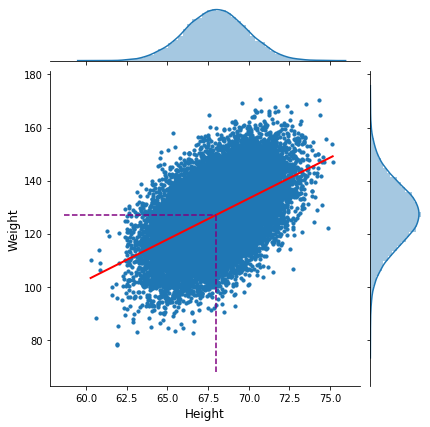

In [8]:
from sklearn.linear_model import LinearRegression
snsax=sns.jointplot(x="Height", y="Weight", marginal_kws=dict(bins=50,kde=True),s=10,data=dataHW);
linregr=LinearRegression().fit(np.array(dataHW['Height']).reshape(-1, 1),dataHW['Weight'])
snsax.ax_joint.plot([dataHW['Height'].min(),dataHW['Height'].max()],\
         [linregr.intercept_+linregr.coef_[0]*dataHW['Height'].min(),\
          linregr.intercept_+linregr.coef_[0]*dataHW['Height'].max()],'r-',lw=2)
snsax.ax_joint.plot([dataHW['Height'].mean(),dataHW['Height'].mean()],\
                [snsax.ax_joint.get_ylim()[0],dataHW['Weight'].mean()],c='purple',linestyle='dashed')
snsax.ax_joint.plot([snsax.ax_joint.get_xlim()[0],dataHW['Height'].mean()],\
                   [dataHW['Weight'].mean(),dataHW['Weight'].mean()],c='purple',linestyle='dashed')
snsax.ax_joint.set_xlabel("Height",fontsize=12)
snsax.ax_joint.set_ylabel("Weight",fontsize=12)
plt.show()

We can also print out the summary of the OLS result using *statsmodels* library.

In [9]:
results = ols(formula = 'Weight ~ Height', data=dataHW).fit()
print(results.summary(title='OLS Results for original "HeightWeight" dataset'))
print("\nRMSE =",np.sqrt(results.mse_resid))

               OLS Results for original "HeightWeight" dataset                
Dep. Variable:                 Weight   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:35:11   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -82.5757      2.280    -36.214      0.0

Let's create the weight vector for later usage.

In [10]:
w_=np.array(results.params)[:,np.newaxis]
w_

array([[-82.57574306],
       [  3.08347645]])

We may also get the standard errors of the estimated coefficients by taking the diagonal of the weight (regression coefficient) variance-covariance matrix.

In [11]:
np.sqrt(np.diag(results.mse_resid*inv(X1dot.T@X1dot)))[:,np.newaxis]

array([[2.28021584],
       [0.03352287]])

In the remaining part, we will check how the different linear transformations applied to the input variables will affect the outcome of the linear regression.

## 2. Centering the data <a name="DataCentering"></a>

We shall start our investigation by centering the input data.

### Properties of centering

First, let's calculate the mean vector of the *BloodPressure2* containing the mean value for each feature.

In [12]:
mu_=X.mean(axis=0,keepdims=True).T
mu_

array([[ 62.45454545],
       [195.        ]])

Then let's create the centered input matrix $\mathbf Xc=\mathbf X-\mu^\top$ and print it out. Also, print out the new mean values to check that the data is centered.

In [13]:
Xc=X-mu_.T
print(Xc)
print("--------- Mean --------------\n",Xc.mean(axis=0))

[[-10.45454545 -22.        ]
 [ -3.45454545 -11.        ]
 [  4.54545455  -1.        ]
 [ 10.54545455  16.        ]
 [  1.54545455   1.        ]
 [ 11.54545455  25.        ]
 [ -8.45454545  -7.        ]
 [ -1.45454545  -7.        ]
 [  2.54545455  12.        ]
 [-16.45454545 -28.        ]
 [  9.54545455  22.        ]]
--------- Mean --------------
 [1.29189588e-15 0.00000000e+00]


As we can see from the above printout, the centered data has zero mean.

Now, let's calculate the condition number again using the centered design matrix.

In [14]:
Xcdot=np.insert(Xc,0,np.ones(N),axis=1)
eigval,eigvect=eigh(Xcdot.T@Xcdot)
print("Eigenvalues of the product matrix:")
print(eigval[:,np.newaxis])
print("Condition number =",np.sqrt(eigval.max()/eigval.min()))

Eigenvalues of the product matrix:
[[  11.        ]
 [  69.55557898]
 [3759.17169375]]
Condition number = 18.486289006989363


As we can see, the condition number dropped significantly. Does that mean that we get rid of the collinearity issue by centering the data?

Let's check again this with the VIF values.

In [15]:
for idx in range(2):
    print(vif(Xc,idx))

9.525021512872081
9.52502151287209


As we can see, the VIF values are the same, thus, while centering the data resolves the conditioning problem of the OLS, it does not solve the collinearity issue. This seems reasonable, as - with centering the data - we do not do anything else then shift the entire scatter of observations such that their mean will be in the origin as we will see below in the scatter plot.

**Note:** *Although, centering does not solve the collinearity issue, if the conditioning number is high, we should still center the data. Remember from the book, that bad conditioning results in very different OLS results during matrix inversion $\mathbf {\dot X}^\top\mathbf {\dot X}$ even if the input is changed slightly.*

Now, let's check that the centered data has the same hat matrix as the original one.

In [16]:
H=Xdot@inv(Xdot.T@Xdot)@Xdot.T
Hc=Xcdot@inv(Xcdot.T@Xcdot)@Xcdot.T
np.sum(np.abs(H-Hc))
H-Hc

array([[ 1.11577414e-14,  1.26010313e-14,  1.34614542e-14,
         1.55708779e-14,  1.41137102e-14,  1.66949787e-14,
         1.30312428e-14,  1.31006317e-14,  1.50157664e-14,
         1.06581410e-14,  1.62925229e-14],
       [ 8.40993941e-15,  9.46465128e-15,  1.04638520e-14,
         1.34614542e-14,  1.14214194e-14,  1.48978052e-14,
         1.11109039e-14,  1.04638520e-14,  1.36834988e-14,
         7.99360578e-15,  1.45335133e-14],
       [-1.41553436e-14, -1.49880108e-14, -1.61537450e-14,
        -1.35724765e-14, -1.35724765e-14, -1.07830411e-14,
        -9.85322934e-15, -1.50990331e-14, -9.93649607e-15,
        -1.31630817e-14, -1.02348685e-14],
       [ 4.44089210e-15,  5.53723734e-15,  5.99520433e-15,
         8.60422844e-15,  7.16093851e-15,  1.02140518e-14,
         7.45237205e-15,  5.95357097e-15,  9.60342916e-15,
         4.63518113e-15,  9.76996262e-15],
       [-1.08385523e-14, -1.12410081e-14, -1.19348975e-14,
        -1.22957200e-14, -1.15601972e-14, -1.19765309e-14,
  

And indeed, they are the same, except for rounding errors. 

We can check that the sample covariance matrix $\mathbf S$  of the input vector does not change either.

In [17]:
S=1/(N-1)*(X-mu_.T).T@(X-mu_.T)
Sc=1/(N-1)*Xc.T@Xc
S-Sc

array([[0., 0.],
       [0., 0.]])

And yes, the covariance matrix is not affected by centering the data. The same is true for the Mahalanobis distances, they are not affected either when the data is centered.

In [18]:
dM=np.sqrt(np.array([np.float((X[i][:,np.newaxis]-mu_).T@inv(S)@(X[i][:,np.newaxis]-mu_))\
                     for i in range(N)]))[:,np.newaxis]
dMc=np.sqrt(np.array([np.float((Xc[i][:,np.newaxis]-Xc.mean(axis=0,keepdims=True).T).T@inv(Sc)@\
            (Xc[i][:,np.newaxis]-Xc.mean(axis=0,keepdims=True).T)) for i in range(N)]))[:,np.newaxis]
dM-dMc

array([[ 0.00000000e+00],
       [ 4.44089210e-16],
       [ 2.22044605e-16],
       [ 4.44089210e-16],
       [ 3.88578059e-16],
       [-4.44089210e-16],
       [-4.44089210e-16],
       [ 3.33066907e-16],
       [-2.22044605e-16],
       [ 0.00000000e+00],
       [-2.22044605e-16]])

Then let's check the correlation coefficient by creating the correlation matrix $\mathbf R$:

In [19]:
np.corrcoef(X,rowvar=False)

array([[1.        , 0.94605146],
       [0.94605146, 1.        ]])

Then normalize each column of the centered data using the Euclidean norm. That is, we calculate first the Euclidean norm of each feature by taking the square root of the sum of squared values for each column.

In [20]:
norm2feature_=np.sqrt(np.sum(Xc**2,axis=0,keepdims=True)).T
norm2feature_

array([[28.82233982],
       [54.75399529]])

Then divide the input matrix with this vector of Eucledian norms to obtain normalized features (and not normalized observations!):

In [21]:
Xnf=Xc/norm2feature_.T
Xnf

array([[-0.36272369, -0.40179716],
       [-0.11985652, -0.20089858],
       [ 0.15770595, -0.01826351],
       [ 0.36587781,  0.29221612],
       [ 0.05362002,  0.01826351],
       [ 0.40057312,  0.45658769],
       [-0.29333307, -0.12784455],
       [-0.0504659 , -0.12784455],
       [ 0.08831533,  0.21916209],
       [-0.57089555, -0.51137821],
       [ 0.3311825 ,  0.40179716]])

If we take the Euclidean norm of each feature, then it should be equal to one.

In [22]:
norm(Xnf,ord=2,axis=0)

array([1., 1.])

If we take the inner product of the two normalized feature vectors, then it should provide the cosine of the angle between the two feature vectors, and that should be the same as the Pearson correlation coefficient between the input variables.

In [23]:
Xnf[:,0][:,np.newaxis].T@Xnf[:,1][:,np.newaxis]

array([[0.94605146]])

Because that value is close to 1, then the two feature vectors are almost collinear.

### Visualization of centering

We can plot the distribution of the original *Height* and the centered *Height* of the *HeightWeight* dataset.

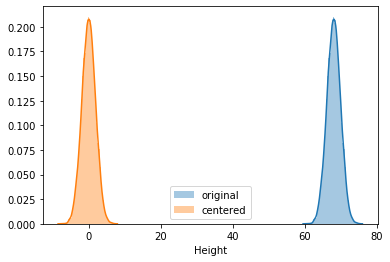

In [24]:
dataHWcenter=dataHW-dataHW.mean()
dataHWcenter['Weight']=dataHW['Weight']
sns.distplot(dataHW['Height'], kde=True, rug=False,label='original')
sns.distplot(dataHWcenter['Height'], kde=True, rug=False,label='centered')
plt.legend()
plt.show()

As can be seen from the above figure, the only difference between the two distribution is in their mean. The centered data has zero mean.

Let's create a joint distribution (scatter plot of the weight vs. height) together with marginal distributions for the original dataset. For comparison, let's plot the estimated regression line, as well as the mean of the input and output.

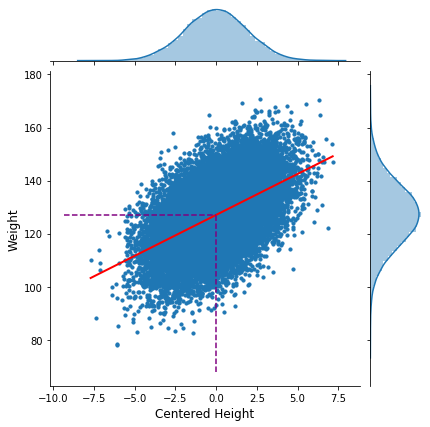

In [25]:
snsax=sns.jointplot(x="Height", y="Weight", marginal_kws=dict(bins=50,kde=True),s=10,\
                    data=dataHWcenter)
linregr=LinearRegression().fit(np.array(dataHWcenter['Height']).reshape(-1, 1),dataHWcenter['Weight'])
snsax.ax_joint.plot([dataHWcenter['Height'].min(),dataHWcenter['Height'].max()],\
         [linregr.intercept_+linregr.coef_[0]*dataHWcenter['Height'].min(),\
          linregr.intercept_+linregr.coef_[0]*dataHWcenter['Height'].max()],'r-',lw=2)
snsax.ax_joint.plot([dataHWcenter['Height'].mean(),dataHWcenter['Height'].mean()],\
                   [snsax.ax_joint.get_ylim()[0],dataHWcenter['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.plot([snsax.ax_joint.get_xlim()[0],dataHWcenter['Height'].mean()],\
                   [dataHWcenter['Weight'].mean(),dataHWcenter['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.set_xlabel("Centered Height",fontsize=12)
snsax.ax_joint.set_ylabel("Weight",fontsize=12)
plt.show()

As can be seen from the figure above, we have the same scatter plot and estimated regression line as for the original data. The only difference is that the intercept (vertical dashed line) is now the estimated mean of the output when the input is zero.

### Summary of OLS result for centered data

Finally, let's check the summary of the OLS results for the centered data of the *HeightWeight* dataset.

In [26]:
resultsC = ols(formula = 'Weight ~ Height', data=dataHWcenter).fit()
print(resultsC.summary(title='OLS Results for centered "HeightWeight" dataset'))
print("\nRMSE =",np.sqrt(resultsC.mse_resid))

               OLS Results for centered "HeightWeight" dataset                
Dep. Variable:                 Weight   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:35:14   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    127.0794      0.064   1993.451      0.0

The standard errors of the regression coefficients can be obtained by the formula derived in the book.

In [27]:
X1c=np.array(dataHWcenter[["Height"]])
X1cdot=np.insert(X1c,0,np.ones(X1c.shape[0]),axis=1)
np.sqrt(np.diag(resultsC.mse_resid*inv(X1cdot.T@X1cdot)))[:,np.newaxis]

array([[0.06374846],
       [0.03352287]])

Let's create the linear transformation matrix (with scale equal to 1 and offset equal to minus the mean of the *Height* input variable).

In [28]:
Ac=np.zeros((X1c.shape[1]+1,X1c.shape[1]+1))
np.fill_diagonal(Ac,1)
Ac[0,1]=-np.array(dataHW.mean())[0]
print(Ac)

[[  1.        -67.9931136]
 [  0.          1.       ]]


The new design matrix can be obtained also by multiplying the original design matrix from the right with the transformation matrix just created. 

In [29]:
np.sum(np.abs(X1dot@Ac-X1cdot))

0.0

Then we can obtain the new regression coefficient from the original ones using the formula derived in the book:

In [30]:
inv(Ac)@w_

array([[127.07942116],
       [  3.08347645]])

And indeed, these values match the values presented in the printout of the OLS results above.

Using the formula derived in the book, we can also get the new standard errors using the weight covariance matrix obtained with the original data.

In [31]:
np.sqrt(np.diag(inv(Ac)@(results.mse_resid*inv(X1dot.T@X1dot))@(inv(Ac)).T))[:,np.newaxis]

array([[0.06374846],
       [0.03352287]])

The generalized variance of the weight vector does not change because the determinant of the linear transformation is 1.

In [32]:
det(inv(Ac))**2

1.0

We can check this easily:

In [33]:
det(results.mse_resid*inv(X1dot.T@X1dot))-\
det(inv(Ac)@(results.mse_resid*inv(X1dot.T@X1dot))@(inv(Ac)).T)

-9.740878893424454e-20

**Note:** *Although centering the data does not have any effect on the estimated regression model,  it shall be still applied if the interpretation of the intercept is important or in case the condition number is high. The latter is important to avoid to not have big changes in the outcome of the OLS when the input matrix is even slightly modified.*

## 3. Standardizing the data <a name="DataStandardization"></a>

Another useful linear transformation is the standardization of the data.

### Properties of standardization

Let's create the vector of standard deviations (a vector with elements corresponding to the standard deviation of each feature) of the *BloodPressure2* dataset:

In [34]:
sigma_=X.std(axis=0,keepdims=True,ddof=1).T
sigma_

array([[ 9.11442413],
       [17.31473361]])

And then create the standardized input matrix as $\mathbf {X_*}\equiv \frac{\mathbf{X}-\boldsymbol{\mu}^\top}{\boldsymbol\sigma^\top}$. 

Print out the standardized input matrix together with the new mean and standard deviation of each feature.

In [35]:
Xs=(X-mu_.T)/sigma_.T
print(Xs)
print("--------- Mean --------------\n",Xs.mean(axis=0))
print("----- Standard deviation ----\n",Xs.std(axis=0,ddof=1))

[[-1.14703302 -1.27059419]
 [-0.37901961 -0.6352971 ]
 [ 0.49871001 -0.05775428]
 [ 1.15700722  0.9240685 ]
 [ 0.1695614   0.05775428]
 [ 1.26672342  1.44385704]
 [-0.92760062 -0.40427997]
 [-0.1595872  -0.40427997]
 [ 0.27927761  0.69305138]
 [-1.80533023 -1.61711988]
 [ 1.04729102  1.27059419]]
--------- Mean --------------
 [1.41301112e-16 0.00000000e+00]
----- Standard deviation ----
 [1. 1.]


As can be seen, with standardized data we obtain a distribution with mean zero and unit variance.

We can check that the hat matrix is not altered with the standardization of the data.

In [36]:
Xsdot=np.insert(Xs,0,np.ones(N),axis=1)
Hs=Xsdot@inv(Xsdot.T@Xsdot)@Xsdot.T
Hs-H

array([[-1.12132525e-14, -1.26287869e-14, -1.34336986e-14,
        -1.55153668e-14, -1.40998324e-14, -1.66117120e-14,
        -1.30589983e-14, -1.31006317e-14, -1.49914803e-14,
        -1.07136522e-14, -1.62231339e-14],
       [-8.54871729e-15, -9.52016244e-15, -1.04083409e-14,
        -1.33365541e-14, -1.14214194e-14, -1.47486190e-14,
        -1.11937369e-14, -1.04638520e-14, -1.36626821e-14,
        -8.10462808e-15, -1.44467771e-14],
       [ 1.43496326e-14,  1.50712776e-14,  1.60982339e-14,
         1.33504319e-14,  1.35447209e-14,  1.06165077e-14,
         1.00197628e-14,  1.51545443e-14,  9.88098492e-15,
         1.35308431e-14,  1.00496868e-14],
       [-3.80251386e-15, -5.28743715e-15, -6.21724894e-15,
        -9.32587341e-15, -7.27196081e-15, -1.09634524e-14,
        -7.02216063e-15, -5.82867088e-15, -9.86710713e-15,
        -3.58046925e-15, -1.04638520e-14],
       [ 1.08663079e-14,  1.12548859e-14,  1.19071419e-14,
         1.22679644e-14,  1.15601972e-14,  1.19210197e-14,
  

And indeed, they are equal except for rounding errors. 

With standardization, the covariance matrix $\mathbf S$ is equal to the correlation matrix $\mathbf R$ calculated earlier.

In [37]:
Ss=1/(N-1)*Xs.T@Xs
Ss

array([[1.        , 0.94605146],
       [0.94605146, 1.        ]])

We may check how the Mahalanobis distances are affected by standardization.

In [38]:
dMs=np.sqrt(np.array([np.float((Xs[i][:,np.newaxis]-Xs.mean(axis=0,keepdims=True).T).T@inv(Ss)@\
            (Xs[i][:,np.newaxis]-Xs.mean(axis=0,keepdims=True).T)) for i in range(N)]))[:,np.newaxis]
dM-dMs

array([[-2.22044605e-16],
       [-1.11022302e-16],
       [-8.88178420e-16],
       [-2.22044605e-16],
       [ 2.22044605e-16],
       [-2.44249065e-15],
       [-1.11022302e-15],
       [-3.33066907e-16],
       [-1.55431223e-15],
       [-1.77635684e-15],
       [-1.55431223e-15]])

As we can see, the Mahalanobis distances are not affected. That should not be a surprise because, in the definition of the Mahalanobis distance, the spread of the data is also counted. Just changing the scale of the spread will not affect the actual spread of the data, as can be seen below at the visualization of the transformation.

We can use the *StandardScaler* of scikit-learn to obtain the same result. 

**Note:** *scikit learn uses the biased version of the standard deviation, but (for large N this should not be a problem, only for small samples, like in our case, will be different.*

In [39]:
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xstd=Std.fit_transform(X)

sigmab_=X.std(axis=0,keepdims=True).T
print("Biased standard deviation of the features:\n",sigmab_)
Xsb=(X-mu_.T)/sigmab_.T

Xstd-Xsb

Biased standard deviation of the features:
 [[ 8.69026243]
 [16.50895074]]


array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

You may obtain the mean and standard deviation of the features with *mean_* and *scale_* attributes.

In [40]:
print("Mean of the features:\n",Std.mean_)
print("\nStandard deviation of the features:\n",Std.scale_)

Mean of the features:
 [ 62.45454545 195.        ]

Standard deviation of the features:
 [ 8.69026243 16.50895074]


You may only center the data by setting the *with_std* parameter to False when instantiating the StandardScaler.

In [41]:
Center=StandardScaler(with_std=False)
Xcenter=Center.fit_transform(X)
Xcenter-Xc

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

### Visualization of standardization

Now, let's visualize this data transformation for the *Height* input of the *HeightWeight* dataset.

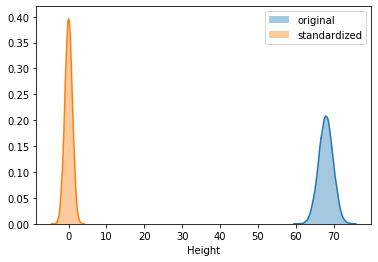

In [42]:
sns.distplot(dataHW['Height'], kde=True, rug=False,label='original')
dataHWstd=pd.DataFrame(Std.fit_transform(np.array(dataHW['Height']).reshape(-1,1)),columns=['Height'])
dataHWstd['Weight']=dataHW['Weight']
sns.distplot(dataHWstd['Height'], kde=True, rug=False,label='standardized')
plt.legend()
plt.show()

As can be seen from above, the standardized distribution is sharper because it has a unit variance while the original data had a variance greater than one.

Let's check the joint distribution with the marginal distribution of the standardized data. Let's plot the estimated regression line, as well.

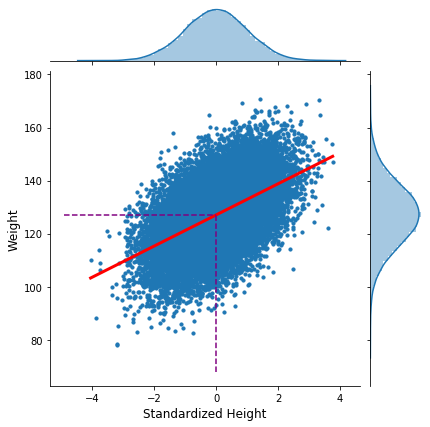

In [43]:
snsax=sns.jointplot(x="Height", y="Weight", marginal_kws=dict(bins=50,kde=True),s=10,data=dataHWstd)
linregr=LinearRegression().fit(np.array(dataHWstd['Height']).reshape(-1, 1),dataHWstd['Weight'])
snsax.ax_joint.plot([dataHWstd['Height'].min(),dataHWstd['Height'].max()],\
         [linregr.intercept_+linregr.coef_[0]*dataHWstd['Height'].min(),\
          linregr.intercept_+linregr.coef_[0]*dataHWstd['Height'].max()],'r-',lw=3)
snsax.ax_joint.plot([dataHWstd['Height'].mean(),dataHWstd['Height'].mean()],\
                   [snsax.ax_joint.get_ylim()[0],dataHWstd['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.plot([snsax.ax_joint.get_xlim()[0],dataHWstd['Height'].mean()],\
                   [dataHWstd['Weight'].mean(),dataHWstd['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.set_xlabel("Standardized Height",fontsize=12)
snsax.ax_joint.set_ylabel("Weight",fontsize=12)
plt.show()

Again, the scatter plot and the estimated regression line looks the same, except that now the input variable *Height* has mean zero and unit variance.

### Summary of OLS result for standardized data

Finally, let's check the summary of the OLS results for the standardized data for the *Height* input of the *HeightWeight* dataset using the *statsmodels* library.

In [44]:
resultsStd = ols(formula = 'Weight ~ Height', data=dataHWstd).fit()
print(resultsStd.summary(title='OLS Results for standerdized "HeightWeight" dataset'))
print("RMSE =",np.sqrt(resultsStd.mse_resid))

             OLS Results for standerdized "HeightWeight" dataset              
Dep. Variable:                 Weight   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:35:16   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    127.0794      0.064   1993.451      0.0

We may also get the standard errors of the estimated coefficients by taking the diagonal of the weight variance-covariance matrix.

In [45]:
X1std=np.array(dataHWstd[["Height"]])
X1stddot=np.insert(X1std,0,np.ones(X1std.shape[0]),axis=1)
np.sqrt(np.diag(resultsStd.mse_resid*inv(X1stddot.T@X1stddot)))[:,np.newaxis]

array([[0.06374846],
       [0.06374846]])

Let's create the linear transformation matrix (with scale equal to the inverse of the standard deviation of *Height*, and offset equal to minus the mean of the *Height* input variable).

In [46]:
Astd=np.zeros((X1std.shape[1]+1,X1std.shape[1]+1))
np.fill_diagonal(Astd,1)
Astd[0,1]=-np.array(dataHW.mean())[0]/np.array(dataHW.std(ddof=0))[0]
Astd[1,1]=1/np.array(dataHW.std(ddof=0))[0]
print(Astd)

[[  1.         -35.7549732 ]
 [  0.           0.52586168]]


The new design matrix can be obtained also by multiplying the original design matrix from the right with the transformation matrix just created. This can be easily checked.

In [47]:
np.sum(np.abs(X1dot@Astd-X1stddot))

2.711906648158698e-09

Except for rounding errors, they are the same.

Then we can obtain the new regression coefficient from the original ones using the formula derived in the book:

In [48]:
inv(Astd)@w_

array([[127.07942116],
       [  5.86366442]])

And indeed, these values match the values presented in the printout of the OLS results above.

Using the formula derived in the book, we can also get the new standard errors using the weight covariance matrix obtained with the original data.

In [49]:
np.sqrt(np.diag(inv(Astd)@(results.mse_resid*inv(X1dot.T@X1dot))@(inv(Astd)).T))[:,np.newaxis]

array([[0.06374846],
       [0.06374846]])

The generalized variance of the weight vector increases because the determinant of the linear transformation is greater than one for this particular dataset.

In [50]:
det(inv(Astd))**2

3.6162374935681036

In fact, the increase is provided by the product of the square of the scale factors as was derived in the book.

In [51]:
1/(Astd[1,1])**2

3.616237493568103

We can check this easily:

In [52]:
det(results.mse_resid*inv(X1dot.T@X1dot))-\
det(inv(Astd)@(results.mse_resid*inv(X1dot.T@X1dot))@(inv(Astd)).T)

-1.194810599085598e-05

**Note:** *While standardization does not have any effect on the linear regression model (except that the estimated regression coefficients are different due to different scales), there are machine learning algorithms that perform better when the data is standardized.*

## 4. Min-Max scaling <a name="MinMaxScaling"></a>

With min-max scaling each feature is transformed such that their values will be in the range of $[0,1]$.

### Properties of min-max scaling

The input matrix can be min-max scaled in the following vectorized form: $\mathbf{X}_s=\frac{\mathbf{X}-\mathbf x_{\min}^\top}{(\mathbf x_{\max}-\mathbf x_{\min})^\top}$.

Let's create the min-max scaled input matrix for the *BloodPressure2* dataset and print out. We should also print out the minimum and maximum values of each feature.

In [53]:
xmin_=X.min(axis=0,keepdims=True).T
xmax_=X.max(axis=0,keepdims=True).T
Xmm=(X-xmin_.T)/(xmax_-xmin_).T
print(Xmm)
print("--------- Min --------------\n",Xmm.min(axis=0))
print("--------- Max --------------\n",Xmm.max(axis=0))

[[0.21428571 0.11320755]
 [0.46428571 0.32075472]
 [0.75       0.50943396]
 [0.96428571 0.83018868]
 [0.64285714 0.54716981]
 [1.         1.        ]
 [0.28571429 0.39622642]
 [0.53571429 0.39622642]
 [0.67857143 0.75471698]
 [0.         0.        ]
 [0.92857143 0.94339623]]
--------- Min --------------
 [0. 0.]
--------- Max --------------
 [1. 1.]


And indeed, the min-max scaled input matrix has only values within the $[0,1]$ range.

Let's check the hat matrix.

In [54]:
Xmmdot=np.insert(Xmm,0,np.ones(N),axis=1)
Hmm=Xmmdot@inv(Xmmdot.T@Xmmdot)@Xmmdot.T
Hmm-H

array([[-1.18238752e-14, -1.32949207e-14, -1.44328993e-14,
        -1.60149671e-14, -1.45022883e-14, -1.64313008e-14,
        -1.26842981e-14, -1.37945211e-14, -1.46584134e-14,
        -1.09356968e-14, -1.60566005e-14],
       [-8.71525074e-15, -9.71445147e-15, -1.08801856e-14,
        -1.32394096e-14, -1.12965193e-14, -1.40165657e-14,
        -1.04196166e-14, -1.06303855e-14, -1.28161370e-14,
        -8.02136135e-15, -1.36869682e-14],
       [ 1.40720768e-14,  1.48214774e-14,  1.56541446e-14,
         1.39332990e-14,  1.39610545e-14,  1.20181642e-14,
         1.10189635e-14,  1.49047441e-14,  1.12965193e-14,
         1.34753320e-14,  1.15450184e-14],
       [-4.32466563e-15, -5.68989300e-15, -6.63358257e-15,
        -9.43689571e-15, -7.46624984e-15, -1.08246745e-14,
        -7.21644966e-15, -6.24500451e-15, -9.81853487e-15,
        -4.13558077e-15, -1.02973186e-14],
       [ 1.08246745e-14,  1.12687637e-14,  1.19348975e-14,
         1.25732758e-14,  1.17544863e-14,  1.24483757e-14,
  

The Hat matrix is not changed (nor the leverages) as was derived in the book, thus the prediction $\hat y^{(i)}$ is the same after the min-max scaling.

Let's check the scatter matrix of the input.

In [55]:
Smm=1/(N-1)*Xmm.T@Xmm
Smm

array([[0.48584184, 0.4421159 ],
       [0.4421159 , 0.41374155]])

The scatter matrix is changed. Let's see the Mahalanobis distances.

In [56]:
dMmm=np.sqrt(np.array([np.float((Xmm[i][:,np.newaxis]-Xmm.mean(axis=0,keepdims=True).T).T@inv(Smm)@\
        (Xmm[i][:,np.newaxis]-Xmm.mean(axis=0,keepdims=True).T)) for i in range(N)]))[:,np.newaxis]
dM-dMmm

array([[3.96506221e-01],
       [2.52806954e-02],
       [1.32259853e-01],
       [6.09211703e-01],
       [5.53607699e-02],
       [3.96555707e-01],
       [3.26278919e-01],
       [7.02761210e-04],
       [1.54592015e-03],
       [9.81682900e-01],
       [2.60812219e-01]])

As can be seen, the Mahalanobis distances are not preserved any more with min-max scaling.

We can get the same result with *MinMaxScaler.* of the scikit-learn library.

In [57]:
from sklearn.preprocessing import MinMaxScaler
MinMax=MinMaxScaler()
Xmmscale=MinMax.fit_transform(X)

Xmmscale-Xmm

array([[-8.32667268e-17, -2.77555756e-17],
       [ 1.11022302e-16, -2.77555756e-16],
       [ 0.00000000e+00,  1.11022302e-16],
       [ 1.11022302e-16, -2.22044605e-16],
       [-1.11022302e-16,  1.11022302e-16],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16, -3.33066907e-16],
       [-1.11022302e-16, -3.33066907e-16],
       [-2.22044605e-16, -2.22044605e-16],
       [ 0.00000000e+00,  0.00000000e+00],
       [-2.22044605e-16,  2.22044605e-16]])

### Visualization of min-max scaling

Now, let's visualize this data transformation for the *Height* input of the *HeightWeight* dataset.

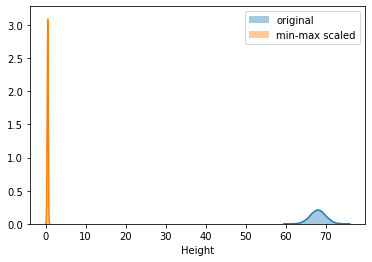

In [58]:
sns.distplot(dataHW['Height'], kde=True, rug=False,label='original')
dataHWmm=pd.DataFrame(MinMax.fit_transform(np.array(dataHW['Height']).reshape(-1,1)),\
                      columns=['Height'])
dataHWmm['Weight']=dataHW['Weight']
sns.distplot(dataHWmm['Height'], kde=True, rug=False,label='min-max scaled')
plt.legend()
plt.show()

As can be seen from above, the distribution of the *Height* input variable is squeezed into the range of [0,1] providing a very sharp distribution.

Let's check the joint distribution with the marginal distribution of the min-max scaled data. Let's plot the estimated regression line, as well.

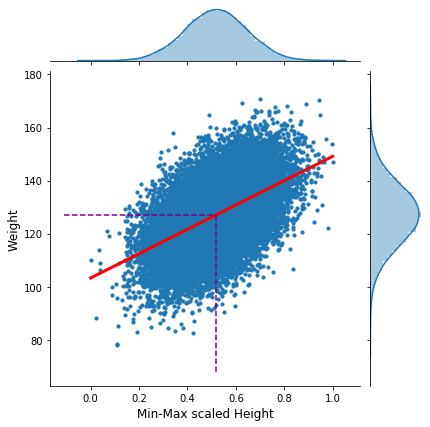

In [59]:
snsax=sns.jointplot(x="Height", y="Weight", marginal_kws=dict(bins=50,kde=True),s=10,data=dataHWmm)
linregr=LinearRegression().fit(np.array(dataHWmm['Height']).reshape(-1, 1),dataHWmm['Weight'])
snsax.ax_joint.plot([dataHWmm['Height'].min(),dataHWmm['Height'].max()],\
         [linregr.intercept_+linregr.coef_[0]*dataHWmm['Height'].min(),\
          linregr.intercept_+linregr.coef_[0]*dataHWmm['Height'].max()],'r-',lw=3)
snsax.ax_joint.plot([dataHWmm['Height'].mean(),dataHWmm['Height'].mean()],\
                   [snsax.ax_joint.get_ylim()[0],dataHWmm['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.plot([snsax.ax_joint.get_xlim()[0],dataHWmm['Height'].mean()],\
                   [dataHWmm['Weight'].mean(),dataHWmm['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.set_xlabel("Min-Max scaled Height",fontsize=12)
snsax.ax_joint.set_ylabel("Weight",fontsize=12)
plt.show()

Again, the scatter plot and the estimated regression line looks the same, except that now the input variable *Height* has values only between 0 and 1.

### Summary of OLS result for min-max scaling

Finally, let's check the summary of the OLS results for the min-max scaled data of the *HeightWeight* dataset.

In [60]:
resultsMM = ols(formula = 'Weight ~ Height', data=dataHWmm).fit()
print(resultsMM.summary(title='OLS Results for min-max scaled "HeightWeight" dataset'))
print("\nRMSE =",np.sqrt(resultsMM.mse_resid))

            OLS Results for min-max scaled "HeightWeight" dataset             
Dep. Variable:                 Weight   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:35:19   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.2912      0.266    387.785      0.0

We may also get the standard errors of the estimated coefficients by taking the diagonal of the weight variance-covariance matrix.

In [61]:
X1mm=np.array(dataHWmm[["Height"]])
X1mmdot=np.insert(X1mm,0,np.ones(X1mm.shape[0]),axis=1)
np.sqrt(np.diag(resultsMM.mse_resid*inv(X1mmdot.T@X1mmdot)))[:,np.newaxis]

array([[0.26636167],
       [0.49863397]])

Let's create the linear transformation matrix (with scale equal to the inverse of the difference maximum-minimum of *Height*, and offset equal to minus the minimum of the *Height* input variable).

In [62]:
Amm=np.zeros((X1mm.shape[1]+1,X1mm.shape[1]+1))
np.fill_diagonal(Amm,1)
Amm[0,1]=-np.array(dataHW.min())[0]/(np.array(dataHW.max())[0]-np.array(dataHW.min())[0])
Amm[1,1]=1/(np.array(dataHW.max())[0]-np.array(dataHW.min())[0])
print(Amm)

[[ 1.         -4.05247929]
 [ 0.          0.06722942]]


The new design matrix can be obtained also by multiplying the original design matrix from the right with the transformation matrix just created. This can be easily checked.

In [63]:
np.sum(np.abs(X1dot@Amm-X1mmdot))

0.0

And indeed, they are the same.

Then we can obtain the new regression coefficient from the original ones using the formula derived in the book:

In [64]:
inv(Amm)@w_

array([[103.29116016],
       [ 45.86498538]])

And indeed, these values match the values presented in the printout of the OLS results above.

Using the formula derived in the book, we can also get the new standard errors using the weight covariance matrix obtained with the original data.

In [65]:
np.sqrt(np.diag(inv(Amm)@(results.mse_resid*inv(X1dot.T@X1dot))@(inv(Amm)).T))[:,np.newaxis]

array([[0.26636167],
       [0.49863397]])

The generalized variance of the weight vector increases significantly because the determinant of the linear transformation is much greater than one for this particular dataset.

In [66]:
det(inv(Amm))**2

221.24896531359994

In fact, the increase is provided by the product of the square of the scale factors as was derived in the book.

In [67]:
1/(Amm[1,1])**2

221.24896531360002

**Note:* *Although min-max scaling does not have any effect on the estimated regression line and provides the same prediction, there are machine learning algorithms that perform much better if all the inputs are scaled into the range of [0,1].*

## 5. Max-Abs scaling <a name="MaxAbsScaling"></a>

With max-abs scaling, each feature is transformed such that their absolute values will be less or equal to 1. If the original feature has also negative values with amplitude close to the max value, then the feature will be translated into the range of $[-1,+1$.

### Properties of max-abs scaling

The input matrix can be max-abs scaled in the following vectorized form: $\mathbf X_r=\frac{\mathbf{X}}{|\left \{ \mathbf x_j \right \}_{\max}|^\top}$.

Let's create the max-abs scaled input matrix for the *BloodPressure2* dataset and print out. We should also print out the minimum and maximum values of each feature.

In [68]:
xmax_=X.max(axis=0,keepdims=True).T
Xma=(X)/(np.abs(xmax_)).T
print(Xmm)
print("--------- Min --------------\n",Xma.min(axis=0))
print("--------- Max --------------\n",Xma.max(axis=0))

[[0.21428571 0.11320755]
 [0.46428571 0.32075472]
 [0.75       0.50943396]
 [0.96428571 0.83018868]
 [0.64285714 0.54716981]
 [1.         1.        ]
 [0.28571429 0.39622642]
 [0.53571429 0.39622642]
 [0.67857143 0.75471698]
 [0.         0.        ]
 [0.92857143 0.94339623]]
--------- Min --------------
 [0.62162162 0.75909091]
--------- Max --------------
 [1. 1.]


Because the *Height* input variable has only positive values, the max-abs scaled input matrix has only values within the $[0.6,1]$ range.

Let's check the hat matrix.

In [69]:
Xmadot=np.insert(Xma,0,np.ones(N),axis=1)
Hma=Xmmdot@inv(Xmadot.T@Xmadot)@Xmadot.T
Hma-H

array([[ 1.30296825e+00,  1.41589844e+00,  2.22417546e+00,
         3.21065031e-01,  4.02273722e-01, -1.62497571e+00,
        -1.79669697e+00,  1.22175956e+00, -2.07204454e+00,
         3.00552346e-01, -1.69497559e+00],
       [ 1.01550199e+00,  1.15507152e+00,  1.87947955e+00,
         3.35793923e-01,  3.44647384e-01, -1.27620090e+00,
        -1.54943765e+00,  1.00664853e+00, -1.70671410e+00,
         1.42670972e-01, -1.34746124e+00],
       [ 7.69624897e-01,  9.80326386e-01,  1.72157837e+00,
         4.28631598e-01,  3.24546444e-01, -9.87013441e-01,
        -1.47780652e+00,  8.73710052e-01, -1.48033770e+00,
        -7.82434187e-02, -1.07501666e+00],
       [ 2.79849935e-01,  3.93584535e-01,  7.31126920e-01,
         2.17464877e-01,  1.40421339e-01, -3.65905055e-01,
        -6.44736614e-01,  3.56893474e-01, -6.04384136e-01,
        -9.43835103e-02, -4.09931765e-01],
       [ 6.77001329e-01,  7.70047682e-01,  1.25298637e+00,
         2.23862615e-01,  2.29764922e-01, -8.50800597e-01,
  

The Hat matrix is not changed (nor the leverages), thus the prediction is the same after the max-abs scaling.

In [70]:
Sma=1/(N-1)*Xma.T@Xma
Sma

array([[0.79870343, 0.8320516 ],
       [0.8320516 , 0.87039876]])

The scatter matrix is changed. Let's see the Mahalanobis distances.

In [71]:
dMma=np.sqrt(np.array([np.float((Xma[i][:,np.newaxis]-Xma.mean(axis=0,keepdims=True).T).T@inv(Sma)@\
        (Xma[i][:,np.newaxis]-Xma.mean(axis=0,keepdims=True).T)) for i in range(N)]))[:,np.newaxis]
dM-dMma

array([[4.80588983e-01],
       [8.77387001e-01],
       [5.65483028e-01],
       [4.04806309e-05],
       [7.18148950e-02],
       [6.43267804e-01],
       [2.72648250e-01],
       [6.07752868e-01],
       [1.03872345e+00],
       [7.13326551e-02],
       [7.67034284e-01]])

The Mahalanobis distances are not preserved with max-abs scaling.

We can also get the same result with *MaxAbsScaler* of scikit-learn library.

In [72]:
from sklearn.preprocessing import MaxAbsScaler
MaxAbs=MaxAbsScaler()
Xmascale=MaxAbs.fit_transform(X)

Xmascale-Xma

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

### Visualization of max-abs scaling

Now, let's visualize this data transformation for the *Height* input of the *HeightWeight* dataset.

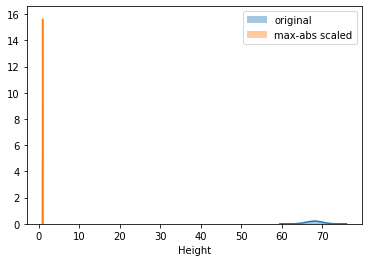

In [73]:
sns.distplot(dataHW['Height'], kde=True, rug=False,label='original')
dataHWma=pd.DataFrame(MaxAbs.fit_transform(np.array(dataHW['Height']).reshape(-1,1)),\
                      columns=['Height'])
dataHWma['Weight']=dataHW['Weight']
sns.distplot(dataHWma['Height'], kde=True, rug=False,label='max-abs scaled')
plt.legend()
plt.show()

As can be seen from above, the distribution of the *Height* input variable is squeezed into the range of [0.6,1] providing a very sharp distribution, even sharper than what we obtained with min-max scaling.

Let's check the joint distribution with the marginal distribution of the max-abs scaled data. Let's plot the estimated regression line, as well.

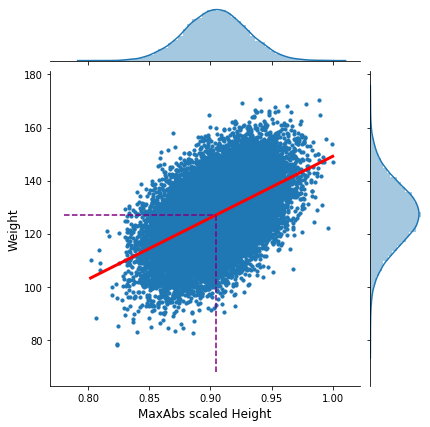

In [74]:
snsax=sns.jointplot(x="Height", y="Weight", marginal_kws=dict(bins=50,kde=True),s=10,data=dataHWma)
linregr=LinearRegression().fit(np.array(dataHWma['Height']).reshape(-1, 1),dataHWma['Weight'])
snsax.ax_joint.plot([dataHWma['Height'].min(),dataHWma['Height'].max()],\
         [linregr.intercept_+linregr.coef_[0]*dataHWma['Height'].min(),\
          linregr.intercept_+linregr.coef_[0]*dataHWma['Height'].max()],'r-',lw=3)
snsax.ax_joint.plot([dataHWma['Height'].mean(),dataHWma['Height'].mean()],\
                   [snsax.ax_joint.get_ylim()[0],dataHWma['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.plot([snsax.ax_joint.get_xlim()[0],dataHWma['Height'].mean()],\
                   [dataHWma['Weight'].mean(),dataHWma['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.set_xlabel("MaxAbs scaled Height",fontsize=12)
snsax.ax_joint.set_ylabel("Weight",fontsize=12)
plt.show()

As can be seen from the above scatter plot the estimated regression line is the same relative to the scatter plot. As it can be seen, now the input is squezzed into the range of [0.6,1].

### Summary of OLS result for max-abs scaling

Finally, let's check the summary of the OLS results for the max-abs scaled data of the *HeightWeight* dataset.

In [75]:
resultsMA = ols(formula = 'Weight ~ Height', data=dataHWma).fit()
print(resultsMA.summary(title='OLS Results for max-abs scaled "HeightWeight" dataset'))
print("\nRMSE =",np.sqrt(resultsMA.mse_resid))

            OLS Results for max-abs scaled "HeightWeight" dataset             
Dep. Variable:                 Weight   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:35:21   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -82.5757      2.280    -36.214      0.0

We may also get the standard errors of the estimated coefficients by taking the diagonal of the weight variance-covariance matrix.

In [76]:
X1ma=np.array(dataHWma[["Height"]])
X1madot=np.insert(X1ma,0,np.ones(X1ma.shape[0]),axis=1)
np.sqrt(np.diag(resultsMA.mse_resid*inv(X1madot.T@X1madot)))[:,np.newaxis]

array([[2.28021584],
       [2.51933781]])

**Note**: *Max-abs scaling is a particular case of min-max scaling. In fact, the scikit-learn library allows setting whatever min and max values you want during *MinMaxScaler* instantiation.*

## 6. Robust scaling <a name="RobustScaling"></a>

Because the standardization is sensitive to outliers, the robust scaling uses median instead of mean and interquartile range instead of standard deviation, which are more robust to outliers to transform the data.

### Properties of robust scaling

The input matrix can be scaled robustly in the following vectorized form: $\mathbf X_r=\frac{\mathbf{X}-\mathbf{\tilde x}^\top}{\mathbf s_\text{IQR}^\top}$.

Let's create the robust scaled input matrix for the *BloodPressure2* dataset and print out. We should also print out the median and interquartile range values of each feature. As a comparison we can also print out the mean and standard deviation of each transformed feature.

In [77]:
from scipy.stats import iqr
xmed_=np.median(X,axis=0,keepdims=True).T
xiqr_=iqr(X,axis=0,keepdims=True).T
Xr=(X-xmed_.T)/xiqr_.T
print(Xr)
print("--------- Median ----------\n",np.median(Xr,axis=0))
print("---------- Mean -----------\n",np.mean(Xr,axis=0))
print("---------- IQR ------------\n",iqr(Xr,axis=0))
print("--- Standard deviation ----\n",np.std(Xr,axis=0))

[[-0.92307692 -0.91304348]
 [-0.38461538 -0.43478261]
 [ 0.23076923  0.        ]
 [ 0.69230769  0.73913043]
 [ 0.          0.08695652]
 [ 0.76923077  1.13043478]
 [-0.76923077 -0.26086957]
 [-0.23076923 -0.26086957]
 [ 0.07692308  0.56521739]
 [-1.38461538 -1.17391304]
 [ 0.61538462  1.        ]]
--------- Median ----------
 [0. 0.]
---------- Mean -----------
 [-0.11888112  0.04347826]
---------- IQR ------------
 [1. 1.]
--- Standard deviation ----
 [0.66848173 0.71778047]


And indeed, the robust scaled input matrix has zero median and unit interquartile range. There are no outliers that really affect the mean, although the standard deviation is slightly altered with the robust scale of the *Height* data

Let's check the hat matrix.

In [78]:
Xrdot=np.insert(Xr,0,np.ones(N),axis=1)
Hr=Xrdot@inv(Xrdot.T@Xrdot)@Xrdot.T
Hr-H

array([[-1.12132525e-14, -1.25732758e-14, -1.32949207e-14,
        -1.54494473e-14, -1.40720768e-14, -1.66117120e-14,
        -1.31977762e-14, -1.30728761e-14, -1.50816859e-14,
        -1.07691633e-14, -1.62925229e-14],
       [-8.40993941e-15, -9.32587341e-15, -1.00475184e-14,
        -1.32394096e-14, -1.13381526e-14, -1.49082136e-14,
        -1.15229007e-14, -1.02973186e-14, -1.39402379e-14,
        -8.13238366e-15, -1.46757606e-14],
       [ 1.43218770e-14,  1.53765889e-14,  1.70974346e-14,
         1.40443213e-14,  1.37667655e-14,  1.06338549e-14,
         8.90953977e-15,  1.54876112e-14,  9.29811783e-15,
         1.29549149e-14,  9.87404603e-15],
       [-4.37150316e-15, -5.34294831e-15, -5.55111512e-15,
        -8.43769499e-15, -7.04991621e-15, -1.02140518e-14,
        -7.85482790e-15, -5.75928194e-15, -9.88792381e-15,
        -4.71844785e-15, -9.90874049e-15],
       [ 1.08524301e-14,  1.13103971e-14,  1.21014310e-14,
         1.23789867e-14,  1.16018306e-14,  1.19626531e-14,
  

The Hat matrix is not changed (nor the leverages), thus the prediction is the same after the robust scaling.

In [79]:
Sr=1/(N-1)*Xr.T@Xr
Sr

array([[0.50710059, 0.49364548],
       [0.49364548, 0.56880907]])

The scatter matrix is changed. Let's see the Mahalanobis distances.

In [80]:
dMr=np.sqrt(np.array([np.float((Xr[i][:,np.newaxis]-Xr.mean(axis=0,keepdims=True).T).T@inv(Sr)@\
            (Xr[i][:,np.newaxis]-Xr.mean(axis=0,keepdims=True).T)) for i in range(N)]))[:,np.newaxis]
dM-dMr

array([[0.01025478],
       [0.10641268],
       [0.32656142],
       [0.08880088],
       [0.06437864],
       [0.02139089],
       [0.29555013],
       [0.12156383],
       [0.20465971],
       [0.04882141],
       [0.04389603]])

The Mahalanobis distances are not preserved with robust scaling.

We can get the same result with *RobustScaler* of the scikit-learn library.

In [81]:
from sklearn.preprocessing import RobustScaler
Robust=RobustScaler()
Xrscale=Robust.fit_transform(X)

Xrscale-Xr

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

### Visualization of robust scaling

Now, let's visualize this data transformation for the *Height* input of the *HeightWeight* dataset.

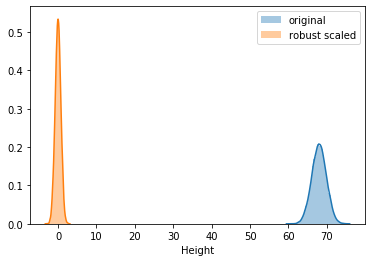

In [82]:
sns.distplot(dataHW['Height'], kde=True, rug=False,label='original')
dataHWr=pd.DataFrame(Robust.fit_transform(np.array(dataHW['Height']).reshape(-1,1)),\
                     columns=['Height'])
dataHWr['Weight']=dataHW['Weight']
sns.distplot(dataHWr['Height'], kde=True, rug=False,label='robust scaled')
plt.legend()
plt.show()

As can be seen, the transformed data has a much sharper distribution as it has unit interquartile range, while the original data had an interquartile range greater than one.

Let's check the joint distribution with the marginal distribution of the robust scaled data. Let's plot the estimated regression line, as well.

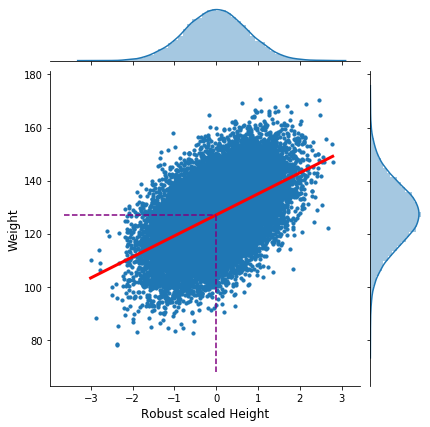

In [83]:
snsax=sns.jointplot(x="Height", y="Weight", marginal_kws=dict(bins=50,kde=True),s=10,data=dataHWr)
linregr=LinearRegression().fit(np.array(dataHWr['Height']).reshape(-1, 1),dataHWr['Weight'])
snsax.ax_joint.plot([dataHWr['Height'].min(),dataHWr['Height'].max()],\
         [linregr.intercept_+linregr.coef_[0]*dataHWr['Height'].min(),\
          linregr.intercept_+linregr.coef_[0]*dataHWr['Height'].max()],'r-',lw=3)
snsax.ax_joint.plot([dataHWr['Height'].mean(),dataHWr['Height'].mean()],\
                   [snsax.ax_joint.get_ylim()[0],dataHWr['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.plot([snsax.ax_joint.get_xlim()[0],dataHWr['Height'].mean()],\
                   [dataHWr['Weight'].mean(),dataHWr['Weight'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.set_xlabel("Robust scaled Height",fontsize=12)
snsax.ax_joint.set_ylabel("Weight",fontsize=12)
plt.show()

### Summary of OLS result for robust scaled data

Finally, let's check the summary of the OLS results for the robust scaled data of the *HeightWeight* dataset.

In [84]:
resultsR = ols(formula = 'Weight ~ Height', data=dataHWr).fit()
print(resultsR.summary(title='OLS Results for robust scaled "HeightWeight" dataset'))
print("\nRMSE =",np.sqrt(resultsR.mse_resid))

             OLS Results for robust scaled "HeightWeight" dataset             
Dep. Variable:                 Weight   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:35:23   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    127.0874      0.064   1993.574      0.0

We may also get the standard errors of the estimated coefficients by taking the diagonal of the weight variance-covariance matrix.

In [85]:
X1r=np.array(dataHWr[["Height"]])
X1rdot=np.insert(X1r,0,np.ones(X1r.shape[0]),axis=1)
np.sqrt(np.diag(resultsR.mse_resid*inv(X1rdot.T@X1rdot)))[:,np.newaxis]

array([[0.06374852],
       [0.08610551]])

### Robust scaling for Star cluster dataset

Because the HeightWeight dataset does not have an outlier that influences the estimated regression line, we may argue that the Robust scaler could not be effective. So let's see in action with a small dataset that exhibits both outlier masking and swamping effect.

In [86]:
dataStar = pd.read_csv(os.path.join('data','StarClusterCYGOB1.csv'))
dataStar=dataStar.rename(columns={"Log surface termperature of the star": "LogSurfTemp",\
                                  "Log light intensity of the star":"LogLightIntensity"})

As a recap, make the scatter plot together with the marginal distributions.

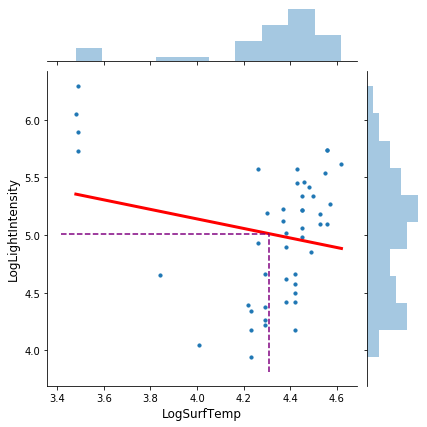

In [87]:
snsax=sns.jointplot(x="LogSurfTemp", y="LogLightIntensity", marginal_kws=dict(bins=10,kde=False),\
                    s=10,data=dataStar)
linregr=LinearRegression().fit(np.array(dataStar['LogSurfTemp']).reshape(-1, 1),\
                               dataStar['LogLightIntensity'])
snsax.ax_joint.plot([dataStar['LogSurfTemp'].min(),dataStar['LogSurfTemp'].max()],\
         [linregr.intercept_+linregr.coef_[0]*dataStar['LogSurfTemp'].min(),\
          linregr.intercept_+linregr.coef_[0]*dataStar['LogSurfTemp'].max()],'r-',lw=3)
snsax.ax_joint.plot([dataStar['LogSurfTemp'].mean(),dataStar['LogSurfTemp'].mean()],\
                   [snsax.ax_joint.get_ylim()[0],dataStar['LogLightIntensity'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.plot([snsax.ax_joint.get_xlim()[0],dataStar['LogSurfTemp'].mean()],\
                   [dataStar['LogLightIntensity'].mean(),dataStar['LogLightIntensity'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.set_xlabel("LogSurfTemp",fontsize=12)
snsax.ax_joint.set_ylabel("LogLightIntensity",fontsize=12)
plt.show()

Check the summary of the OLS results.

In [88]:
resultStar = ols(formula = 'LogLightIntensity ~ LogSurfTemp', data=dataStar).fit()
print(resultStar.summary(title='OLS Results for original "Star cluster" dataset'))
print("\nRMSE =",np.sqrt(resultStar.mse_resid))

               OLS Results for original "Star cluster" dataset                
Dep. Variable:      LogLightIntensity   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.085
Date:                Fri, 09 Oct 2020   Prob (F-statistic):              0.156
Time:                        11:35:24   Log-Likelihood:                -38.804
No. Observations:                  47   AIC:                             81.61
Df Residuals:                      45   BIC:                             85.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.7935      1.237      5.494      

Let's create the squared studentized residuals versus leverages plot together with the contour plot of Cook's distances. Based on the knowledge already acquired in Ch3-Ex3, let's create a function that can be reused in later lab exercises.

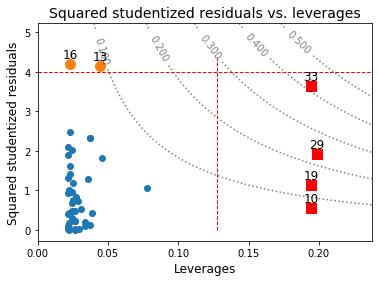

In [89]:
def SquaredStudResidLeveragePlot(OLSresults,CookLevels=None,textdx=0,textdy=0,xyscale=1.2):
    N=int(OLSresults.nobs)
    D=int(OLSresults.df_model)
    h_=OLSresults.get_influence().hat_matrix_diag[:,np.newaxis]
    idx_X=np.nonzero(h_>=3*h_.mean())[0]
    rstud_=OLSresults.get_influence().resid_studentized_external
    idx_R=np.nonzero(np.abs(rstud_)>2.0)[0]
    plt.scatter(h_,rstud_**2)
    plt.scatter(h_[idx_R],rstud_[idx_R]**2,s=100)
    for i in idx_R:
        plt.annotate(i, (float(h_[i]),float(rstud_[i]**2)),(float(h_[i])+textdx,\
                                                            float(rstud_[i]**2)+textdy),fontsize=12)
    plt.scatter(h_[idx_X],rstud_[idx_X]**2,s=100,c='r',marker='s')
    for i in idx_X:
        plt.annotate(i, (float(h_[i]),float(rstud_[i]**2)),(float(h_[i])+textdx,\
                                                            float(rstud_[i]**2)+textdy),fontsize=12)
    plt.plot([3*h_.mean(),3*h_.mean()],[0,xyscale*(rstud_.max())**2],'r--',lw=1)
    plt.plot([0,xyscale*h_.max()],[4,4],'r--',lw=1)
    plt.xlabel('Leverages',fontsize=12)
    plt.ylabel('Squared studentized residuals',fontsize=12)
    plt.title("Squared studentized residuals vs. leverages",fontsize=14)

    if CookLevels!=None:
        # Adding contour plot of the Cook's distances
        x = np.linspace(0, xyscale*h_.max(), 100)
        y = np.linspace(0, (xyscale*rstud_.max())**2, 100)
        X, Y = np.meshgrid(x, y)
        Z = (N-D-1)/(Y+N-D-2)*Y/(D+1)*X/(1-X)
        CS=plt.contour(X, Y, Z, colors='black',levels=CookLevels,linestyles="dotted",alpha=0.5)
        plt.clabel(CS)
        plt.show()
               
# Calling the r_stud**2 x leverage plot function with conour of Cook's distances
SquaredStudResidLeveragePlot(resultStar,CookLevels=[0.1,0.2,0.3,0.4,0.5],textdx=-0.005,textdy=0.15)

Let's create the robust scaled version of the scatter plot.

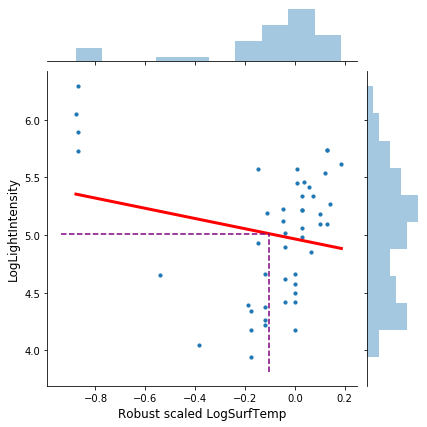

In [90]:
Robust.set_params(quantile_range=(5.0, 95.0))
dataStarR=pd.DataFrame(Robust.fit_transform(np.array(dataStar['LogSurfTemp']).reshape(-1,1)),\
                       columns=['LogSurfTemp'])
dataStarR['LogLightIntensity']=dataStar['LogLightIntensity']

snsax=sns.jointplot(x="LogSurfTemp", y="LogLightIntensity", marginal_kws=dict(bins=10,kde=False),\
                    s=10,data=dataStarR)
linregr=LinearRegression().fit(np.array(dataStarR['LogSurfTemp']).reshape(-1, 1),\
                               dataStarR['LogLightIntensity'])
snsax.ax_joint.plot([dataStarR['LogSurfTemp'].min(),dataStarR['LogSurfTemp'].max()],\
         [linregr.intercept_+linregr.coef_[0]*dataStarR['LogSurfTemp'].min(),\
          linregr.intercept_+linregr.coef_[0]*dataStarR['LogSurfTemp'].max()],'r-',lw=3)
snsax.ax_joint.plot([dataStarR['LogSurfTemp'].mean(),dataStarR['LogSurfTemp'].mean()],\
                   [snsax.ax_joint.get_ylim()[0],dataStarR['LogLightIntensity'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.plot([snsax.ax_joint.get_xlim()[0],dataStarR['LogSurfTemp'].mean()],\
                   [dataStarR['LogLightIntensity'].mean(),dataStarR['LogLightIntensity'].mean()],\
                    c='purple',linestyle='dashed')
snsax.ax_joint.set_xlabel("Robust scaled LogSurfTemp",fontsize=12)
snsax.ax_joint.set_ylabel("LogLightIntensity",fontsize=12)
plt.show()

And print out the OLS result of the robust scaled data.

In [91]:
resultStarR = ols(formula = 'LogLightIntensity ~ LogSurfTemp', data=dataStarR).fit()
print(resultStarR.summary(title='OLS Results for robust scaled "Star cluster" dataset'))
print("\nRMSE =",np.sqrt(resultStarR.mse_resid))

             OLS Results for robust scaled "Star cluster" dataset             
Dep. Variable:      LogLightIntensity   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.085
Date:                Fri, 09 Oct 2020   Prob (F-statistic):              0.156
Time:                        11:35:26   Log-Likelihood:                -38.804
No. Observations:                  47   AIC:                             81.61
Df Residuals:                      45   BIC:                             85.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.9667      0.088     56.328      

No change in the OLS result. 

If we want to use the leave-one-out method to find influential points, then we will have the same result as with the original data. That is clear if we create the squared studentized residuals vs. the leverages together with the contour plot of the Cook's distances.

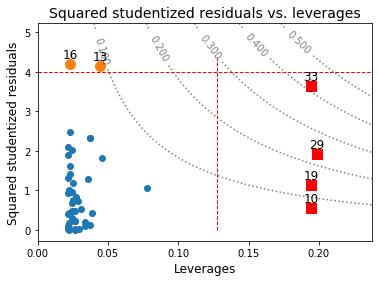

In [92]:
SquaredStudResidLeveragePlot(resultStarR,CookLevels=[0.1,0.2,0.3,0.4,0.5],textdx=-0.005,textdy=0.15)

Thus, the robust scaling did not help in minimizing the outlier masking and swamping effect, and the estimated regression model provides the prediction as to what we obtained with the regression model created for the original data.

**Note:** *Although robust scaling did not have any effect neither on the prediction nor the analysis of influential points, robust scaling is still very useful for other machine learning algorithms that are based on Euclidean distances.*

### Summary

As we have seen, linear transformations do not affect the prediction of the linear regression model, although the regression coefficients might be different due to the different scaling of the input variables. However, other types of machine learning algorithms will provide a different result if a linear transformation will be applied beforehand.

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

**Note:** This Jupyter Notebook is accompanying the book: <br> $\;\;\;\;\;\;$ <b>Advanced Machine Learning Made Easy</b> <br> $\;\;\;\;\;\;$ From Theory to Practice with NumPy and scikit-learn <br> $\;\;\;\;\;\;$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).